**1. Import thư viện cần thiết**

In [12]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**2. Tiền xử lý và chuẩn bị dữ liệu cho mô hình học máy**

In [14]:
# 1. Tải dữ liệu
df = pd.read_excel("Data_final_essay/Final_data.xlsx")
display(df.head(10))
# Danh sách các thực thể không phải quốc gia (tổng hợp từ World Bank)
non_countries = [
    'Not classified', 'World', 'Africa Eastern and Southern',
    'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics',
    'Caribbean small states', 'East Asia & Pacific', 'Europe & Central Asia',
    'Euro area', 'European Union', 'Heavily indebted poor countries (HIPC)',
    'High income', 'Low income', 'Lower middle income', 'Low & middle income',
    'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
    'OECD members', 'Other small states', 'Pacific island small states',
    'South Asia', 'Sub-Saharan Africa', 'Upper middle income'
]

df = df[~df['Country Name'].isin(non_countries)]
print(f"Số dòng sau khi lọc các thực thể tổng hợp: {len(df)}")

# 2. Xử lý Missing biến mục tiêu (biến 'IncomeGroup')
df.rename(columns={'IncomeGroup': 'Target'}, inplace=True)
df.dropna(subset=['Target'], inplace=True)
print(f"Số dòng sau khi lọc các nước không có Target: {len(df)}")

# 3. Tách Biến (Features 'X' và Target 'y')
# Giữ lại các cột để phân tích
country_info_cols = ['Country Name', 'Country Code']
target_col = 'Target'

# Lấy tất cả các cột số làm features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# X là tất cả các cột số, y là cột Target
X = df[numeric_cols]
y = df[target_col]

# 4. Mã hóa Target (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# In ra các lớp để tham khảo
print("\nCác lớp của biến mục tiêu:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")

# 5. Tách dữ liệu Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 6. Tạo Pipeline cho Imputation và Scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit pipeline trên tập train và transform cả 2 tập
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

,Country Name,Country Code,Access to electricity (% of population),"Central government debt, total (% of GDP)",CO2 emissions (tCO2e per capita),Current health expenditure (%GDP),External debt stocks (% of GNI),FDI_net_inflows,GDP_growth(%annual),GDP_per_capita(current $US),...,Infant mortality rate,Inflation,Investment,Life_expectancy,Renewable energy consumption (% of total final energy consumption),"School erollment, secondary (%gross)",Trade(%GDP),Unemployment_rate,urban_population(%population),IncomeGroup
0,Afghanistan,AFG,85.300000,NaN,0.203552,23.088169,23.336849,NaN,-6.240172,357.261153,...,52.000000,13.712102,16.668472,65.617000,20.0,NaN,72.885470,14.100000,26.616000,Low income
1,Aruba,ABW,99.900000,NaN,4.684559,NaN,NaN,2.481503e+08,8.517918,30559.533535,...,NaN,NaN,NaN,76.226000,8.8,131.802170,172.884172,NaN,44.052000,High income
2,Africa Eastern and Southern,AFE,48.801258,NaN,0.816361,5.727920,NaN,2.112935e+10,3.555769,1628.318945,...,39.673059,10.773751,20.338092,64.487020,NaN,45.281620,58.642287,7.985202,37.909012,NaN
3,Africa Western and Central,AFW,55.686683,NaN,0.505462,4.209822,NaN,1.645234e+10,3.974964,1796.668633,...,56.430320,7.930929,NaN,57.987813,NaN,45.637299,NaN,3.658573,49.129808,NaN
4,Albania,ALB,100.000000,NaN,1.659293,6.193681,55.764637,1.441382e+09,4.826696,6846.426694,...,8.300000,6.725203,25.704431,78.769000,NaN,97.322471,84.698057,10.137000,63.799000,Upper middle income
5,Algeria,DZA,100.000000,NaN,4.104114,3.623043,3.235007,2.417960e+08,3.600000,4961.552577,...,20.000000,9.265516,30.377140,76.129000,NaN,104.550270,51.202376,12.346000,74.772000,Upper middle income
6,Angola,AGO,48.500000,NaN,0.767587,2.927376,62.729937,-6.598653e+09,3.044727,2929.694455,...,39.600000,21.355290,26.256018,64.246000,NaN,NaN,69.691071,14.602000,68.081000,Lower middle income
7,American Samoa,ASM,NaN,NaN,0.002069,NaN,NaN,NaN,1.735016,18017.458938,...,NaN,NaN,NaN,72.752000,0.4,NaN,124.684271,NaN,87.196000,High income
8,Andorra,AND,100.000000,NaN,NaN,7.536788,NaN,5.939814e+08,9.564612,42414.059009,...,2.600000,NaN,NaN,84.016000,18.7,98.509872,NaN,NaN,87.811000,High income
9,Arab World,ARB,90.654518,NaN,4.403588,4.439982,NaN,7.698465e+10,6.995414,7931.617893,...,27.767844,5.087542,21.775626,71.876096,NaN,69.456139,87.277723,9.953571,59.054267,NaN


Số dòng sau khi lọc các thực thể tổng hợp: 244
Số dòng sau khi lọc các nước không có Target: 215

Các lớp của biến mục tiêu:
0: High income
1: Low income
2: Lower middle income
3: Upper middle income


**3.Phân tích mô tả (EDA)**


Thống kê mô tả:


,count,mean,std,min,25%,50%,75%,max
Access to electricity (% of population),213.0,8.759061e+01,2.315111e+01,8.400000e+00,8.650000e+01,1.000000e+02,1.000000e+02,1.000000e+02
"Central government debt, total (% of GDP)",40.0,6.115342e+01,3.338012e+01,1.616658e-03,4.266292e+01,5.682295e+01,7.689229e+01,1.541036e+02
CO2 emissions (tCO2e per capita),201.0,4.632735e+00,7.691034e+00,0.000000e+00,7.001036e-01,2.412811e+00,5.263286e+00,7.872628e+01
Current health expenditure (%GDP),189.0,6.916824e+00,3.284187e+00,1.817682e+00,4.385459e+00,6.655893e+00,8.851702e+00,2.308817e+01
External debt stocks (% of GNI),117.0,5.865256e+01,5.092755e+01,2.402366e+00,3.403729e+01,4.683278e+01,6.673459e+01,3.687162e+02
FDI_net_inflows,196.0,9.549826e+09,4.512542e+10,-3.163831e+11,9.915831e+07,8.633555e+08,5.066066e+09,4.168900e+11
GDP_growth(%annual),207.0,4.467353e+00,6.794241e+00,-2.875858e+01,2.554183e+00,4.259361e+00,6.331574e+00,6.333463e+01
GDP_per_capita(current $US),207.0,2.127272e+04,3.107931e+04,2.506342e+02,2.823090e+03,7.770594e+03,2.936071e+04,2.260520e+05
Government expenditure on education (% of GDP),162.0,4.263058e+00,2.092913e+00,7.216748e-06,2.900557e+00,4.059944e+00,5.238063e+00,1.478603e+01
Individuals using the Internet (% of population),182.0,7.056420e+01,2.488441e+01,1.100090e+01,5.736285e+01,7.871345e+01,8.912402e+01,1.000000e+02


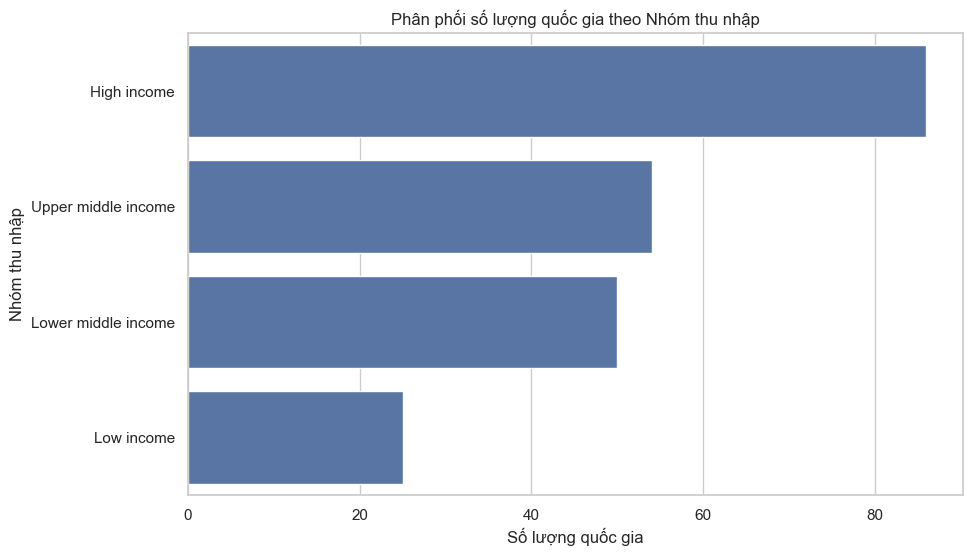

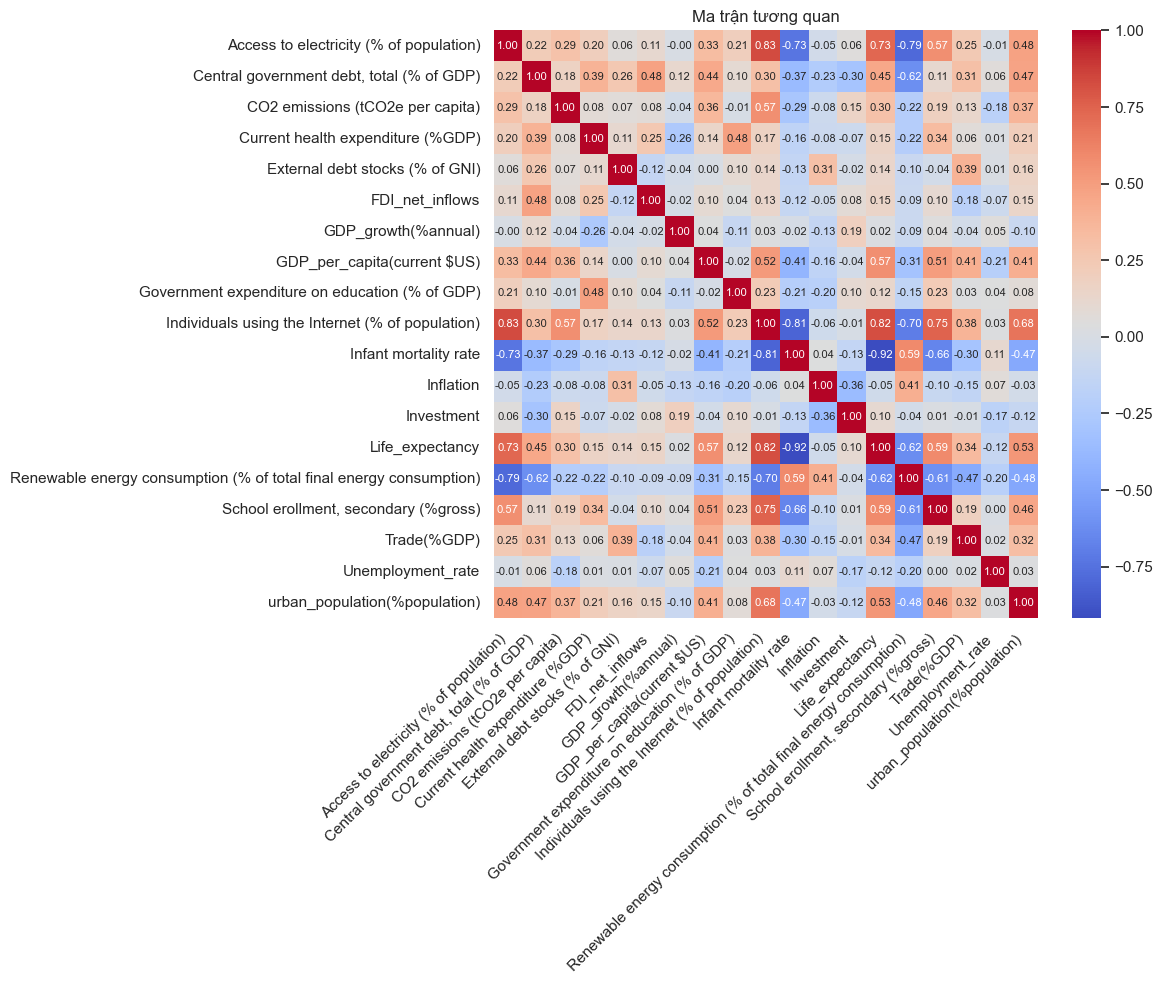


Vẽ biểu đồ Boxplot so sánh các biến theo nhóm thu nhập:


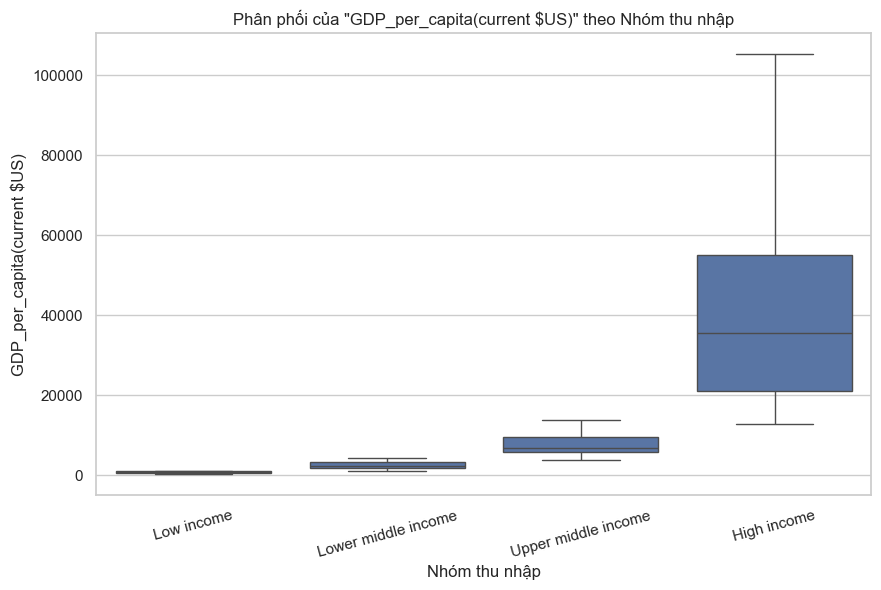

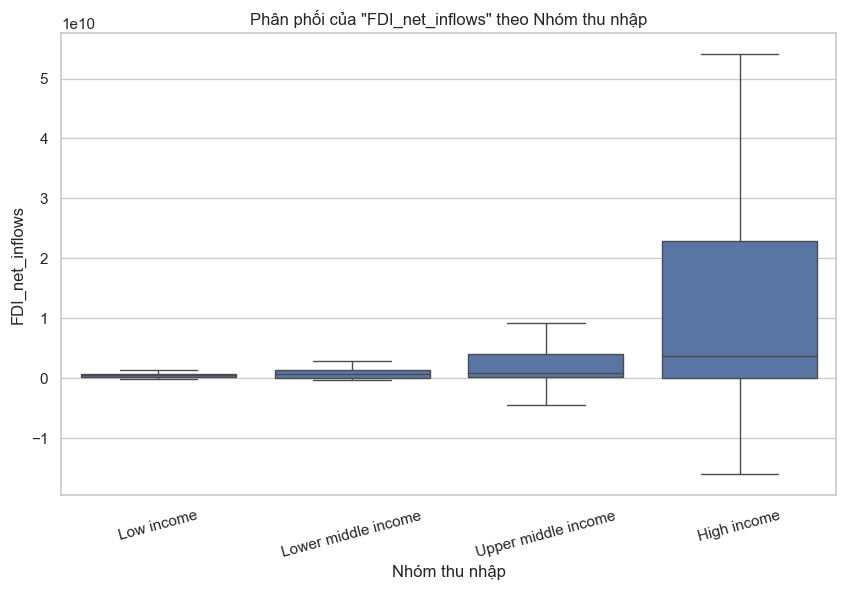

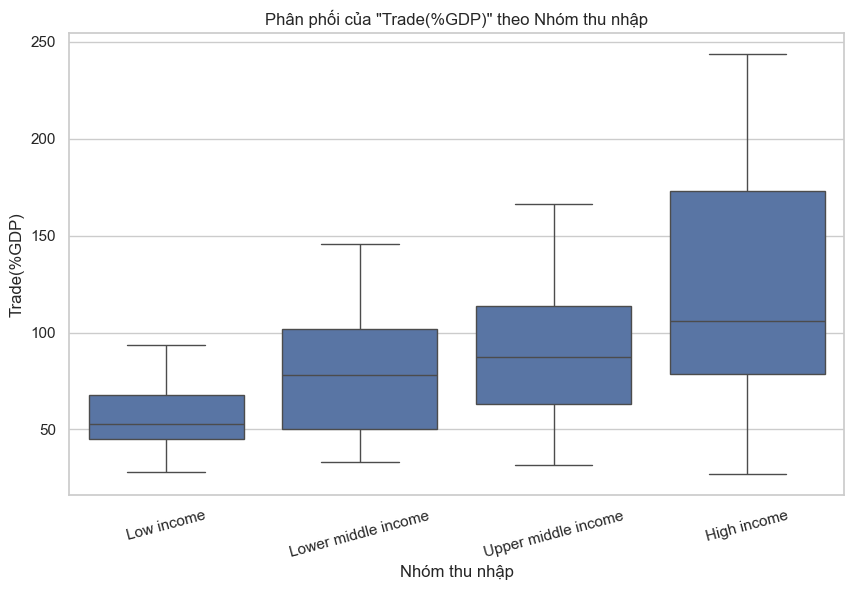

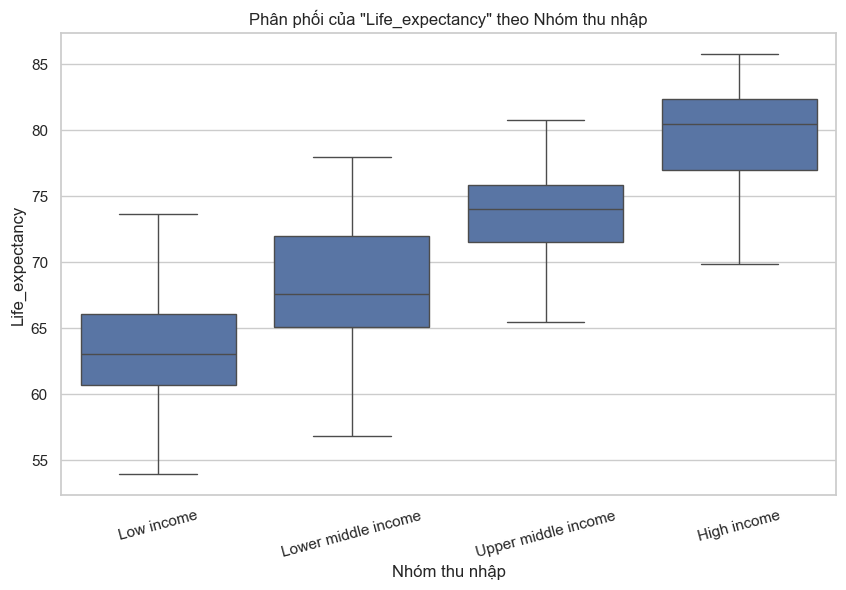

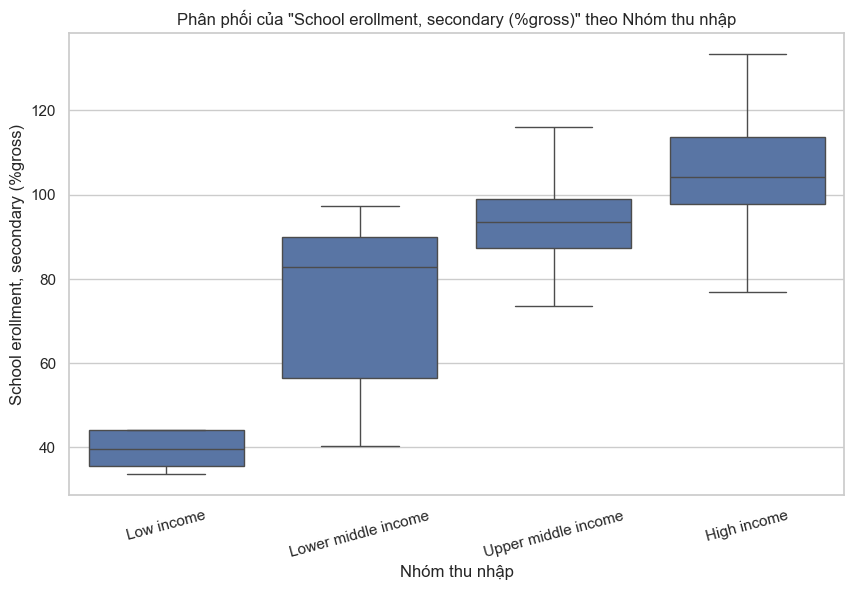

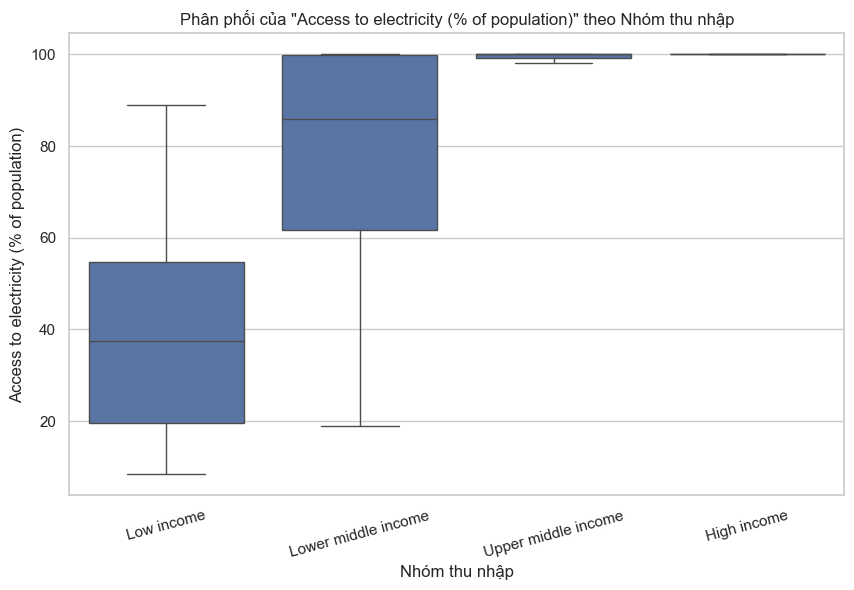

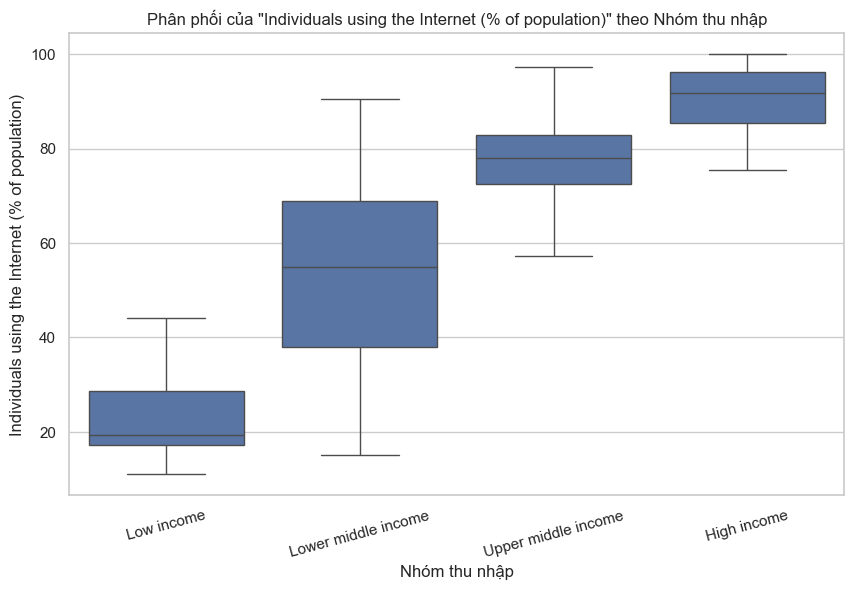

In [15]:
# 1. Thống kê cơ bản
print("\nThống kê mô tả:")
display(df.describe().T)

# 2. Phân phối của biến mục tiêu (Target)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Target', order=df['Target'].value_counts().index)
plt.title('Phân phối số lượng quốc gia theo Nhóm thu nhập')
plt.xlabel('Số lượng quốc gia')
plt.ylabel('Nhóm thu nhập')
plt.show()

# 3. Ma trận tương quan (Correlation Heatmap)
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Ma trận tương quan')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Biểu đồ Boxplot so sánh các nhóm
vars_to_plot = ['GDP_per_capita(current $US)',
                'FDI_net_inflows',
                'Trade(%GDP)',
                'Life_expectancy',
                'School erollment, secondary (%gross)',
                'Access to electricity (% of population)',
                'Individuals using the Internet (% of population)'
               ]

# Lọc các biến có tồn tại trong cột
vars_to_plot = [col for col in vars_to_plot if col in df.columns]

income_order = [
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]
print("\nVẽ biểu đồ Boxplot so sánh các biến theo nhóm thu nhập:")
for var in vars_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Target', y=var,order=income_order, showfliers=False)
    plt.title(f'Phân phối của "{var}" theo Nhóm thu nhập')
    plt.xlabel('Nhóm thu nhập')
    plt.ylabel(var)
    plt.xticks(rotation=15)
    plt.show()

**4. Xây dựng và đánh giá mô hình**

In [16]:
# 1. Định nghĩa các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 để dùng tất cả CPU
}

# 2. Vòng lặp huấn luyện và đánh giá
results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n--- Đang huấn luyện mô hình: {name} ---")

    # Huấn luyện mô hình trên dữ liệu đã được xử lý
    model.fit(X_train_processed, y_train)

    # Dự đoán trên tập test
    y_pred = model.predict(X_test_processed)

    # Đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)

    results[name] = {'accuracy': accuracy, 'report': report, 'model': model}

    print(f"Độ chính xác (Accuracy): {accuracy:.4f}")
    print("Báo cáo phân loại (Classification Report):")
    print(report)

    # Lưu lại mô hình tốt nhất
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\n=== Mô hình tốt nhất là: {best_model.__class__.__name__} với Accuracy = {best_accuracy:.4f} ===")


--- Đang huấn luyện mô hình: Logistic Regression ---
Độ chính xác (Accuracy): 0.6744
Báo cáo phân loại (Classification Report):
                     precision    recall  f1-score   support

        High income       1.00      0.76      0.87        17
         Low income       0.50      0.40      0.44         5
Lower middle income       0.50      0.60      0.55        10
Upper middle income       0.57      0.73      0.64        11

           accuracy                           0.67        43
          macro avg       0.64      0.62      0.62        43
       weighted avg       0.72      0.67      0.68        43


--- Đang huấn luyện mô hình: Decision Tree ---
Độ chính xác (Accuracy): 0.8605
Báo cáo phân loại (Classification Report):
                     precision    recall  f1-score   support

        High income       0.94      0.94      0.94        17
         Low income       1.00      0.60      0.75         5
Lower middle income       0.77      1.00      0.87        10
Upper middle

c:\Documents\KTTTPS\FinalProject_Nguyễn Văn Huy_31231026138\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác (Accuracy): 0.9070
Báo cáo phân loại (Classification Report):
                     precision    recall  f1-score   support

        High income       1.00      0.88      0.94        17
         Low income       1.00      0.80      0.89         5
Lower middle income       0.83      1.00      0.91        10
Upper middle income       0.83      0.91      0.87        11

           accuracy                           0.91        43
          macro avg       0.92      0.90      0.90        43
       weighted avg       0.92      0.91      0.91        43


=== Mô hình tốt nhất là: RandomForestClassifier với Accuracy = 0.9070 ===


**5. Trực quan hóa kết quả mô hình**

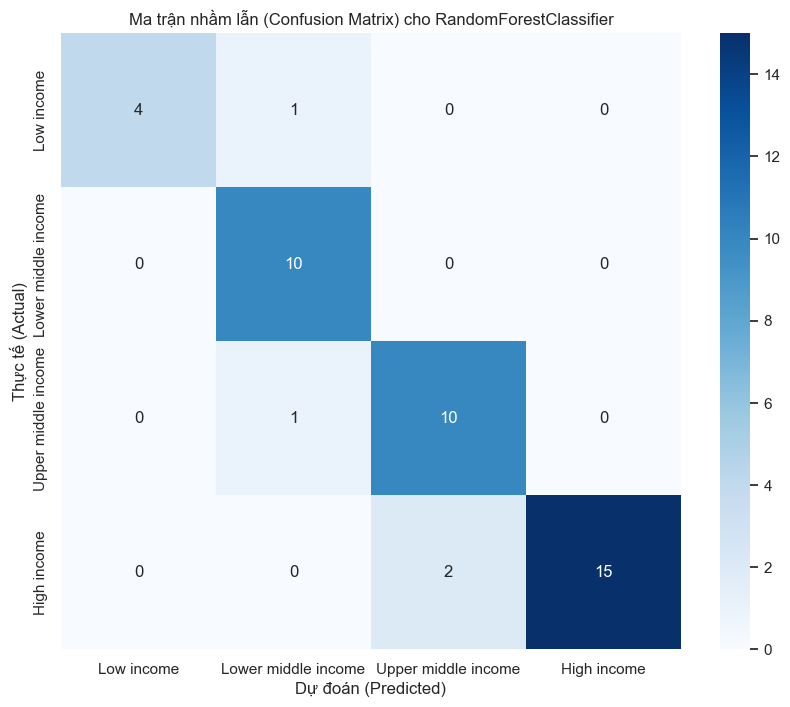

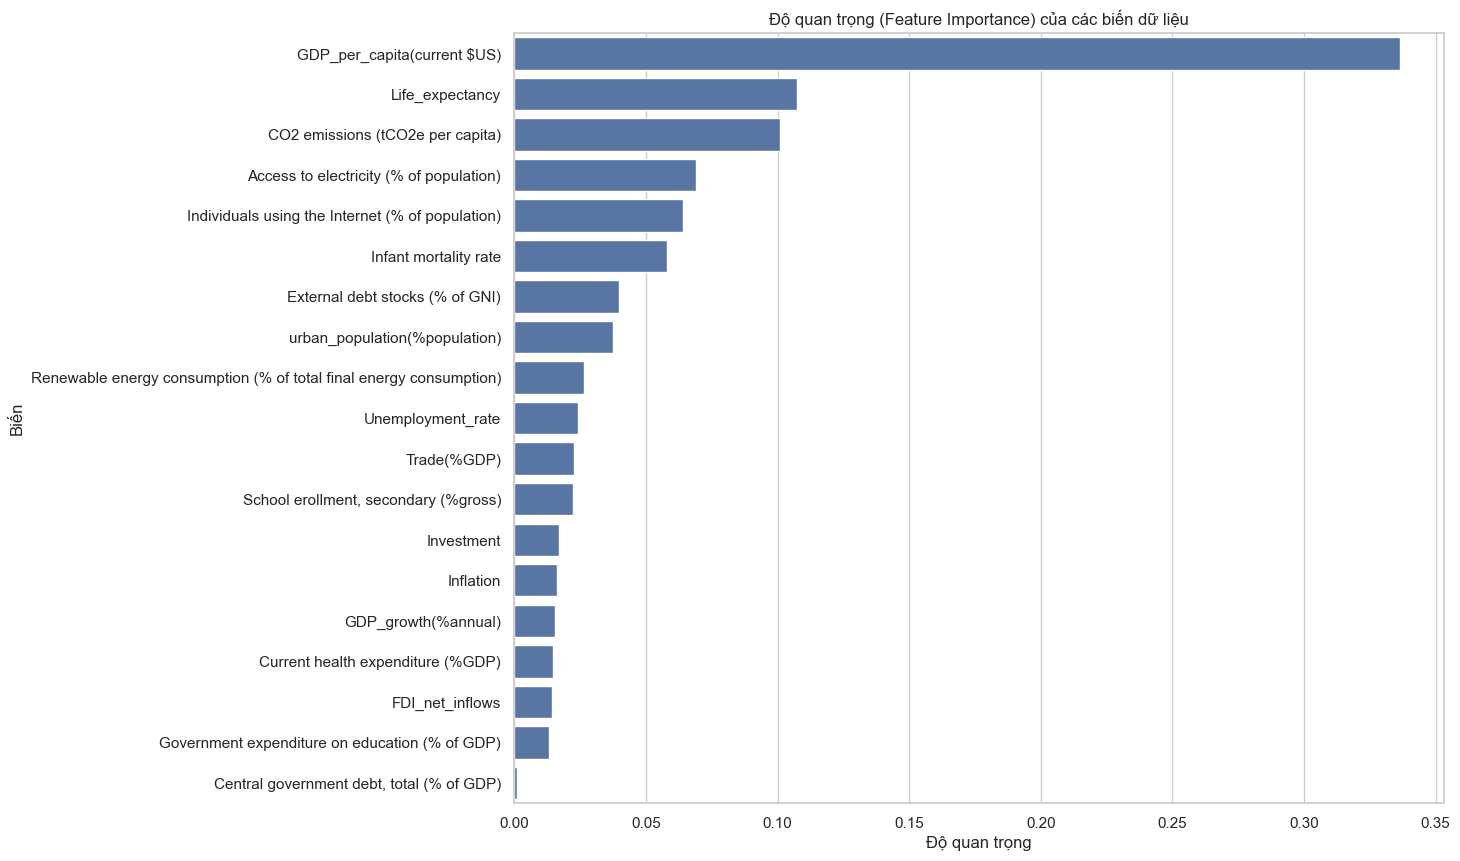

In [17]:
# 1. Trực quan hóa Ma trận nhầm lẫn (Confusion Matrix)
# Dùng mô hình tốt nhất (best_model)
y_pred_best = best_model.predict(X_test_processed)

# Định nghĩa thứ tự lớp mới (1, 2, 3, 0)
new_class_order = [1, 2, 3, 0]
# Lấy tên lớp theo thứ tự mới
new_class_names = [le.classes_[i] for i in new_class_order]

# Tính lại ma trận nhầm lẫn với thứ tự lớp mới
cm = confusion_matrix(y_test, y_pred_best, labels=new_class_order)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=new_class_names,
            yticklabels=new_class_names)
plt.title(f'Ma trận nhầm lẫn (Confusion Matrix) cho {best_model.__class__.__name__}')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.show()

# 2. Trực quan hóa Độ quan trọng của Biến (Feature Importance)
# Chỉ áp dụng cho các mô hình Cây (Decision Tree, Random Forest)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_

    # Tạo DataFrame để trực quan
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Lấy top 20 biến quan trọng nhất
    top_20_features = feature_importance_df.head(20)

    plt.figure(figsize=(12, 10))
    sns.barplot(data=top_20_features, x='Importance', y='Feature')
    plt.title('Độ quan trọng (Feature Importance) của các biến dữ liệu')
    plt.xlabel('Độ quan trọng')
    plt.ylabel('Biến')
    plt.show()